In [1]:
import random 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

random.seed(10)

# Animating Burning Forest Simulation 

### Part 1 : Forest Fire Algorithm

1) Creating class ```forest``` to store random mapping of forest.

In [2]:
class forest :
    def __init__(self, n) :
        N_sqrt = int(np.sqrt(n))
        self.size = N_sqrt ** 2
        self.nrow = N_sqrt
        self.ncol = N_sqrt
        self.map = np.array([])
        
    def generate_forest(self, prob) :
        M = np.array([np.random.choice([0, 3], size=(self.ncol,), p=[1 - prob, prob])])
        for i in range(self.nrow - 1) :
            r = np.array([np.random.choice([0, 3], size=(self.ncol,), p=[1 - prob, prob])])
            M = np.concatenate((M, r))
        self.map = M
        
    def starts_to_burn(self) :
        for i in range(self.ncol) :
            if self.map[0, i] == 3 :
                self.map[0, i] = 2
                
    def burning_forest(self) :
        M = self.map.copy()
        for i in range(self.nrow) :
            for j in range(self.ncol) :
                if self.map[i, j] == 2 :
                    M[i, j] = 1
                    if self.map[i, j] != M[i, j] : 
                        if j != 0 and self.map[i, j - 1] == 3 :
                            M[i, j - 1] = 2
                        if (j < self.ncol - 1) and self.map[i, j + 1] == 3 :
                            M[i, j + 1] = 2
                        if (i < self.nrow - 1) and self.map[i + 1, j] == 3 :
                            M[i + 1][j] = 2
                        if (i < self.nrow - 1) and self.map[i + 1, j] == 3 :
                            M[i + 1][j] = 2
                        if i != 0 and self.map[i - 1, j] == 3 :
                            M[i - 1, j] = 2
        return M
    
    def check_forest(self, other) :
        count = 0
        for i in range(self.nrow) :
            for j in range(self.ncol) :
                if (self.map[i, j] == other[i, j]) :
                    count += 1
        if (count != self.nrow * self.ncol) :
            return True
        else :
            return False
        
    def draw_forest(self, forest) :
        plt.imshow(forest)
        plt.show()
    
    def all_burn(self) :
        
        M = self.map.copy()
        self.starts_to_burn()
        
        while (self.check_forest(M)) :
            M = self.burning_forest()
            self.map = M
            self.draw_forest(self.map)
            M = self.burning_forest()
            #print(self.check_forest(M))
        self.draw_forest(M)

2) Example of initialising instance ```forest``` with grid of size 111.

In [3]:
A = forest(111)

Remark : Since 111 is not a perfect square instance ```A``` only consists of grid with size 10x10.

3) Generate random mapping for instance ```A``` using method ```generate_forest```.

In [4]:
A.generate_forest(0.5)

Remark : The information for the forest map is located in the attribute ```map``` of instance ```A```. 

In [5]:
A.map

array([[0, 0, 0, 0, 0, 0, 0, 3, 3, 3],
       [0, 3, 0, 3, 0, 0, 0, 3, 0, 0],
       [3, 0, 0, 3, 3, 3, 3, 0, 0, 3],
       [3, 3, 3, 0, 3, 0, 0, 0, 3, 0],
       [0, 0, 3, 3, 0, 0, 3, 3, 0, 0],
       [3, 3, 0, 3, 0, 3, 0, 0, 0, 3],
       [3, 0, 3, 0, 3, 3, 3, 3, 0, 3],
       [0, 3, 0, 0, 0, 0, 3, 3, 0, 3],
       [3, 0, 0, 3, 0, 3, 3, 3, 3, 3],
       [3, 3, 0, 0, 0, 3, 0, 3, 0, 3]])

Remark : ```3``` represents unburned trees while ```0``` represents no tree.

4) Running entire process of burning using method ```all_burn``` that includes the visualisation of all stages. Method ```draw_forest``` is used to visualise the final stage of the forest after being burnt completely.

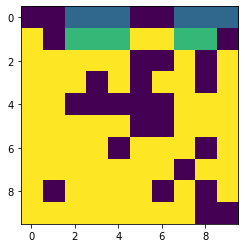

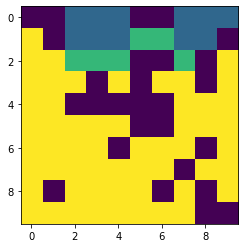

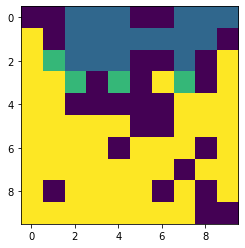

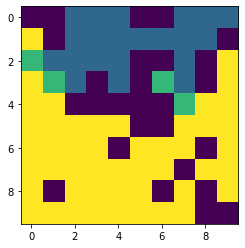

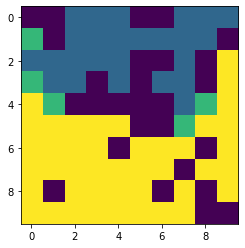

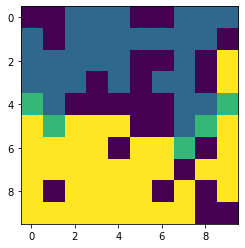

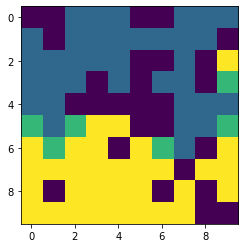

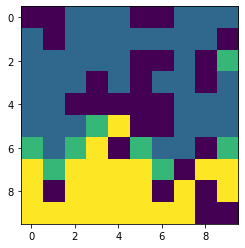

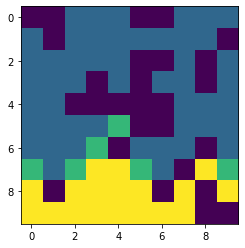

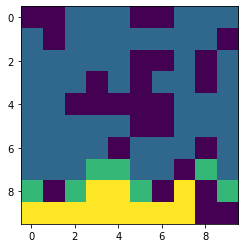

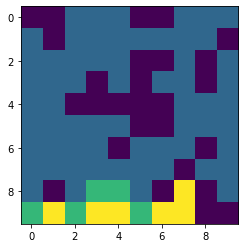

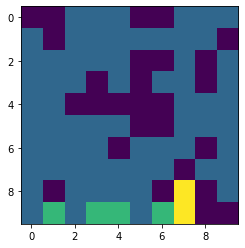

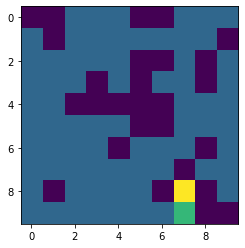

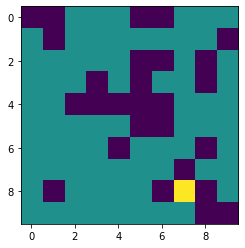

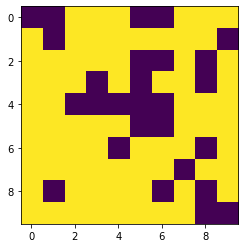

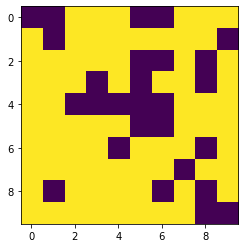

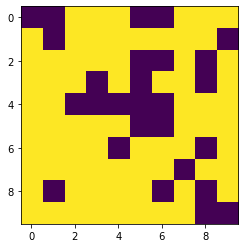

In [6]:
B = forest(111)
B.generate_forest(0.7)

B.all_burn()
B.draw_forest(B.map)

### Part 2 : Forest Fire Animation

1) Importing libraries for data animation.

In [13]:
%matplotlib qt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from matplotlib.animation import ArtistAnimation

2) Introduce some variables (may vary) to set conditions on the forest fire algorithm.

In [14]:
n = 10000
p = 0.7
F = forest(n) 
F.generate_forest(p)

Remark : In this case we create instance of class ```forest``` called ```F``` of size 100x100 with 60 percent spreadness of trees. 

3) We copy the matrix that represent the mapping of the forest from instance ```F``` to help with updating the state of the forest after each burning stages.

In [15]:
f = F.map.copy()

4) Create function ```animate``` to set rule in updating the state of the forest. Then, we use ```FuncAnimation``` to run the animation for the burning process of forest ```F```.

In [16]:
fig = plt.figure() 
im = plt.imshow(F.map, animated=True)

stop_animation = False

def animate(*args) :    
    global F, f
    F.starts_to_burn()

    if ((F.check_forest(f))) :
        
        f = F.burning_forest()
        F.map = f
        im.set_array(f)
        
        f = F.burning_forest()
        #print(F.check_forest(f))
        return im,
    
    else:
        # Stop the animation
        stop_animation = True
        anim.event_source.stop()


anim = FuncAnimation(fig, animate, blit=False, repeat=True, repeat_delay=1000)

plt.show()

4) Make sure that the forest ```F``` has completely burnt.

In [17]:
F.check_forest(f)

False

5) Draw the forest ```F``` to show the final state of the forest.

In [18]:
F.draw_forest(f)